In [1]:
import os
import glob
import importlib
import pandas as pd
import numpy as np

import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.arousal.parse_face_data as pf
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils.helpers as hutils

In [2]:
%matplotlib notebook

In [3]:
eyetracker_dir = '/n/coxfs01/2p-data/eyetracker_tmp'

datakey = '20190617_JC097_fov1'
experiment='gratings'
session, animalid, fovnum = hutils.split_datakey_str(datakey)

traceid='traces001'
rootdir='/n/coxfs01/2p-data'
snapshot=391800

In [4]:
dlc_results_dir, dlc_video_dir = dlcutils.get_dlc_sources()

In [7]:
dlc_outfiles = sorted(glob.glob(os.path.join(dlc_results_dir, 
                    '%s_%s_f*_%i.h5' % (datakey, experiment, snapshot))), 
                      key=hutils.natural_keys)   

for d in dlc_outfiles:
    print(os.path.split(d)[-1])

20190617_JC097_fov1_gratings_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f4bDLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f4cDLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f5bDLC_resnet50_facetrackingJan25shuffle1_391800.h5


In [8]:
dlc_outfile = dlc_outfiles[0]
print(dlc_outfile)

df = pd.read_hdf(dlc_outfile)
DLCscorer = df.columns.get_level_values(level=0).unique()[0]

/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/pose-analysis/20190617_JC097_fov1_gratings_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5


In [9]:
df.head()

scorer    DLC_resnet50_facetrackingJan25shuffle1_391800                        \
bodyparts                                          eyeT                         
coords                                                x          y likelihood   
0                                            378.436859  81.667633        1.0   
1                                            378.107849  81.304512        1.0   
2                                            379.332642  81.922653        1.0   
3                                            378.274261  81.750626        1.0   
4                                            378.435547  83.269806        1.0   

scorer                                                                \
bodyparts        eyeB                               eyeL               
coords              x           y likelihood           x           y   
0          369.577576  128.092712        1.0  341.079254  114.705055   
1          369.753845  129.883575        1.0  339.397736  115.957626   
2          369.931030  127.060867        1.0  342.290619  113.461014   
3          369.772980  128.664307        1.0  340.432190  115.649452   
4          369.482849  125.908928        1.0  341.110565  115.036125   

scorer                            ...                                     \
bodyparts                   eyeR  ...    snoutL2     snoutU1               
coords    likelihood           x  ... likelihood           x           y   
0                1.0  412.015839  ...        1.0  107.732162  156.669556   
1                1.0  412.536102  ...        1.0  100.518883  159.860611   
2                1.0  412.078094  ...        1.0   99.136108  161.200684   
3                1.0  412.083405  ...        1.0   97.674995  165.413345   
4                1.0  411.803650  ...        1.0   85.702057  173.220886   

scorer                                                              \
bodyparts               snoutU2                                paw   
coords    likelihood          x           y likelihood           x   
0                1.0  73.408394  179.491943        1.0  247.789230   
1                1.0  68.481331  183.329391        1.0  233.847595   
2                1.0  65.392967  186.816208        1.0  415.858643   
3                1.0  63.549068  192.259048        1.0  248.179626   
4                1.0  52.759151  202.337265        1.0  228.337418   

scorer                            
bodyparts                         
coords              y likelihood  
0          302.983582   0.001885  
1          299.891998   0.002672  
2          131.360504   0.000410  
3          301.938904   0.001445  
4          310.103210   0.003333  

[5 rows x 81 columns]

In [10]:
tmpdf = df[DLCscorer].copy()
tmpdf.shape

(21506, 81)

In [ ]:
import pylab as pl

In [25]:
A = [tuple([x,y]) for x, y in tmpdf['pupilT'][['x', 'y']].values]
B = [tuple([x,y]) for x, y in tmpdf['pupilB'][['x', 'y']].values]

C = [tuple([x,y]) for x, y in tmpdf['pupilL'][['x', 'y']].values]
D = [tuple([x,y]) for x, y in tmpdf['pupilR'][['x', 'y']].values]

In [28]:
ctrs = [dlcutils.line_intersection((a, b), (c, d)) for a, b, c, d in zip(A, B, C, D)]


In [31]:
import pylab as pl

<IPython.core.display.Javascript object>


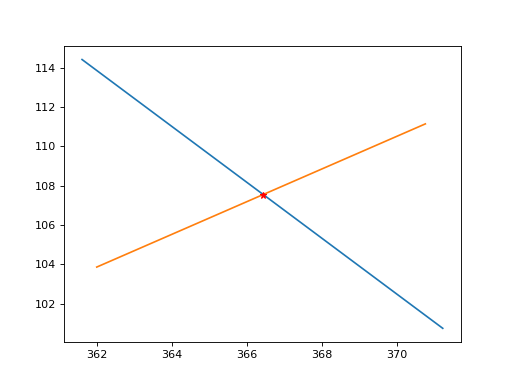

In [38]:
pl.figure()
pl.plot([A[0][0], B[0][0]], [A[0][1], B[0][1]]) # B[0][0])
pl.plot([C[0][0], D[0][0]], [C[0][1], D[0][1]]) # B[0][0])
pl.plot(ctrs[0][0], ctrs[0][1], 'r*')

In [36]:
A[0], B[0]

((371.2261657714844, 100.7364730834961), (361.6025390625, 114.42486572265625))

In [39]:
tmpdf.head()

bodyparts        eyeT                              eyeB              \
coords              x          y likelihood           x           y   
0          378.436859  81.667633        1.0  369.577576  128.092712   
1          378.107849  81.304512        1.0  369.753845  129.883575   
2          379.332642  81.922653        1.0  369.931030  127.060867   
3          378.274261  81.750626        1.0  369.772980  128.664307   
4          378.435547  83.269806        1.0  369.482849  125.908928   

bodyparts                   eyeL                               eyeR  ...  \
coords    likelihood           x           y likelihood           x  ...   
0                1.0  341.079254  114.705055        1.0  412.015839  ...   
1                1.0  339.397736  115.957626        1.0  412.536102  ...   
2                1.0  342.290619  113.461014        1.0  412.078094  ...   
3                1.0  340.432190  115.649452        1.0  412.083405  ...   
4                1.0  341.110565  115.036125        1.0  411.803650  ...   

bodyparts    snoutL2     snoutU1                           snoutU2  \
coords    likelihood           x           y likelihood          x   
0                1.0  107.732162  156.669556        1.0  73.408394   
1                1.0  100.518883  159.860611        1.0  68.481331   
2                1.0   99.136108  161.200684        1.0  65.392967   
3                1.0   97.674995  165.413345        1.0  63.549068   
4                1.0   85.702057  173.220886        1.0  52.759151   

bodyparts                                paw                         
coords              y likelihood           x           y likelihood  
0          179.491943        1.0  247.789230  302.983582   0.001885  
1          183.329391        1.0  233.847595  299.891998   0.002672  
2          186.816208        1.0  415.858643  131.360504   0.000410  
3          192.259048        1.0  248.179626  301.938904   0.001445  
4          202.337265        1.0  228.337418  310.103210   0.003333  

[5 rows x 81 columns]

In [58]:
tmpcol = tmpdf['eyeT'][['x', 'y']].copy()
tmpcol = tmpcol.rename(columns={'eyeT': 'pupilC'})
tmpcol[['x', 'y']] = ctrs

In [57]:
tmpcol

coords,x,y
0,378.436859,81.667633
1,378.107849,81.304512
2,379.332642,81.922653
3,378.274261,81.750626
4,378.435547,83.269806
...,...,...
21501,379.617920,79.780289
21502,379.607544,79.907349
21503,379.563293,79.978218
21504,379.736542,79.944374


In [59]:
tmpdf['pupilC'] = tmpcol
tmpdf.head()

ValueError: Wrong number of items passed 2, placement implies 1